# Python Analysis - House Price Advanced Regression Techniques 
### Business Challenge #02 - Team 12


Produced By: Heesu Kim, Miguel Angel Aquino Moor, Prohit Reddy, Samuel Emehi and Meenakshi M.

**Introduction**

House priced advanced regression technique is based on two data sets: Trained data set and tested data set. in this challenge, the main focus is to analyse the data set by using multiple graphs such as heat map, bar graphs, scatter plots which will help to understand the sale price of the houses and their fluctuations according to the area of demand (Valkov, 2019, July 5). The House Price Advanced Regression Techniques is a machine learning competition hosted on Kaggle that provides a dataset of housing prices along with various features that can help predict the sale price of a house. The goal of the competition is to develop a regression model that can accurately predict the sale price of a house given its features. The dataset contains both categorical and numerical features, and some features have missing values that need to be handled properly. In this context, data preprocessing and exploratory data analysis (EDA) play a crucial role in developing an accurate regression model.

#### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and display the first few rows of the train.csv dataset using pandas

In [2]:
data_train = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data_test = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

data_train.head()

NameError: name 'pd' is not defined

The above code reads in two csv files named train.csv and test.csv using the pandas read_csv() function and assigns the resulting dataframes to variables called data_train and data_test, respectively. The file paths are specified using the raw string (r'...') format.

The data_train.head() function is then called to display the first five rows of the data_train dataframe, which allows for a quick glimpse at the *structure* and content of the data.


The output shows that there are 1460 data points (houses) in the data_train dataset with SalePrice ranging from 34,900 to 755,000 dollars. The mean SalePrice is 180,921.20 dollars with a standard deviation of 79,442.50 dollars. The median (50th percentile) SalePrice is 163,000 dollars. The first quartile (25th percentile) SalePrice is 129,975 dollars, while the third quartile (75th percentile) SalePrice is 214,000 dollars. These statistics can be useful to understand the distribution and variability of the SalePrice variable in the dataset.

#### Descriptive statistics for the SalePrice variable in the data_train dataset

In [4]:
data_train['SalePrice'].describe()

##This code outputs descriptive statistics of the SalePrice variable in the data_train dataframe using the describe() method.

SyntaxError: SyntaxError: invalid syntax

#### Count the number of missing values in each column of the data_train dataset

In [ ]:
data_train.isnull().sum()

#This code uses the isnull() method to create a Boolean mask that indicates whether each element in the data_train dataframe is null (missing) or not. The resulting dataframe of Boolean values is then summed column-wise using the sum() method to count the number of missing values for each column.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


The output shows the number of missing values for each column in the data_train dataframe. For example, the LotFrontage column has 259 missing values, which means that 259 houses in the dataset do not have a recorded lot frontage value. The other columns also have varying numbers of missing values. Identifying and handling missing values is an important step in data preprocessing before modeling.





#### Histogram of SalePrice variable in data_train using Seaborn's displot() function.

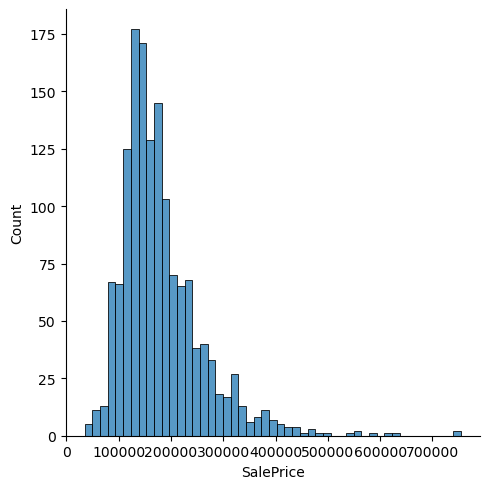

<Figure size 500x500 with 1 Axes>

In [ ]:
sns.displot(data_train['SalePrice'])
plt.show()

## The displot() function is used to visualize the distribution of a univariate set of observations, in this case, the SalePrice variable. 
## It plots a histogram of the data by default, and it can also show a kernel density estimate (KDE) and rug plot.

The resulting plot shows the frequency distribution of sale prices in the dataset, with the x-axis representing the price range and the y-axis representing the count or frequency of houses within that range. The plot appears to be right-skewed, with most houses priced between approximately $100,000 and $300,000, and a few houses priced above $500,000. This information can be useful in understanding the overall distribution of the target variable and identifying any potential outliers.

#### Scatter plot of SalePrice versus GrLivArea in data_train using pandas and matplotlib"

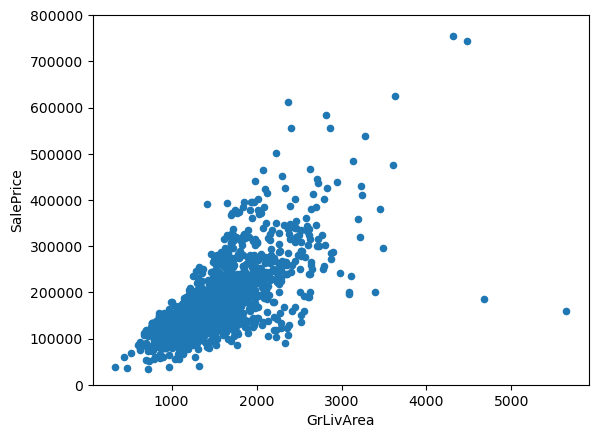

<Figure size 640x480 with 1 Axes>

In [ ]:
data = pd.concat([data_train['SalePrice'], data_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))
plt.show()

The above scatter plot shows that the most dense GrLivAreas are about the sale price of 10000 tp 30000. On the other hand, the largest GrLivArea more than 5000 units has an outlier. and The resulting plot shows the scatter of the data points, with GrLivArea values on the x-axis and SalePrice values on the y-axis. The plot suggests a positive linear relationship between the two variables, with larger living areas generally associated with higher sale prices. There are a few outliers in the dataset, particularly in the top right corner of the plot where there are some large houses with relatively low sale prices. These outliers may warrant further investigation to determine if they represent data entry errors or other anomalies in the data.




#### Heatmap of correlation matrix for data_train using Seaborn and Matplotlib

<AxesSubplot:>

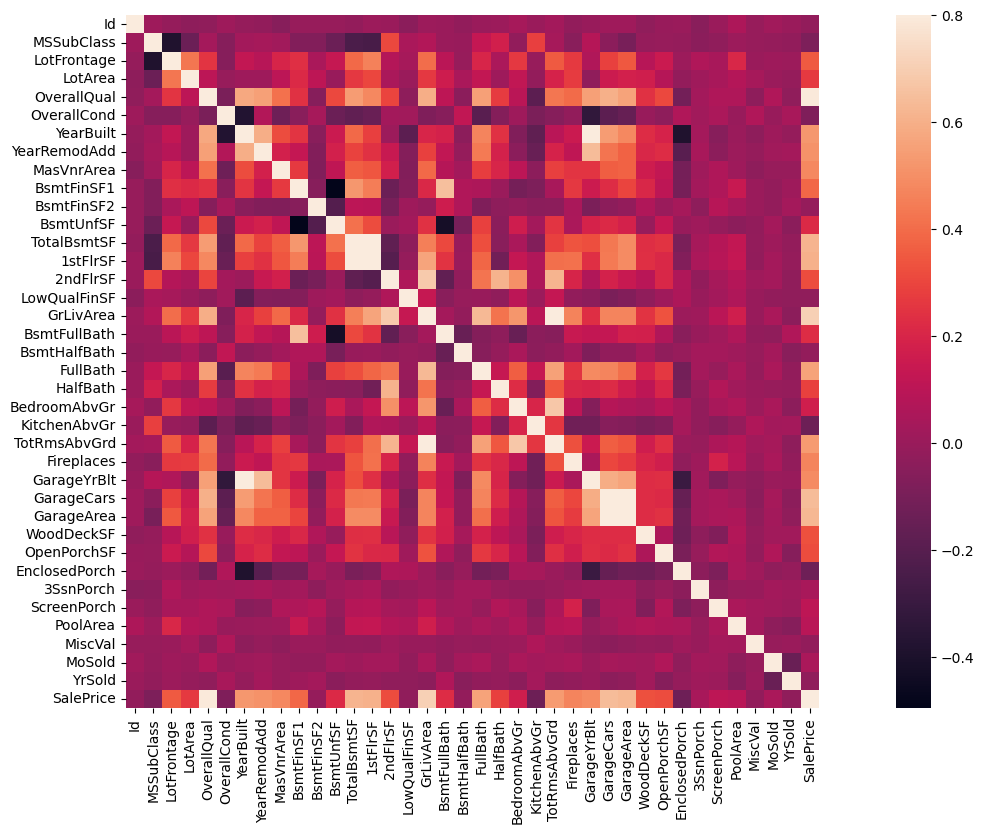

<Figure size 2000x900 with 2 Axes>

In [ ]:
corramt = data_train.corr()
f, ax =plt.subplots(figsize=(20, 9))
sns.heatmap(corramt, vmax=0.8, square=True)

Clearly the above heat map is focused on multiple areas spread. The darker colours focus on the houses that are fully furnished and sale price is comparatively lesser. on the other hand, if the result of lighter colour is determined, it is seen that according to the subplots, the houses with garage facility get more than nominal selling price. Also the resulting heatmap shows the strength of the linear relationship between each pair of features. The darker colors represent higher correlation coefficients, while lighter colors represent lower correlation coefficients. The diagonal line in the heatmap shows the correlation of a feature with itself, which is always equal to 1. The vmax parameter sets the maximum value of the color scale to 0.8. The figsize parameter determines the size of the heatmap.




#### Heatmap of the highest correlated variables with SalePrice in data_train using Seaborn and Matplotlib

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')



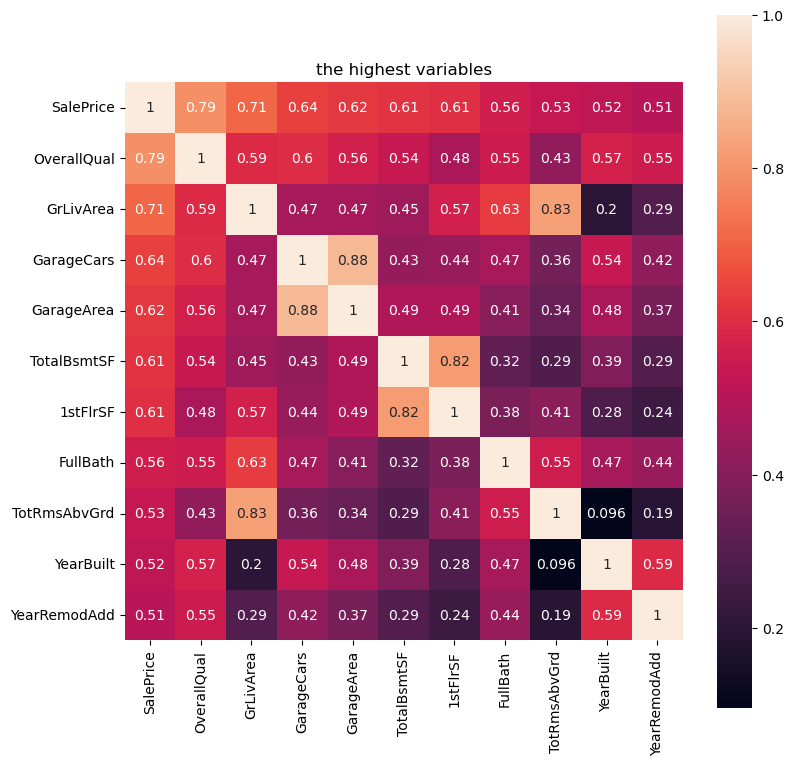

<Figure size 900x900 with 2 Axes>

In [ ]:
highcor_var = corramt.loc[corramt.SalePrice.abs()>0.5].sort_values(by
='SalePrice',ascending = False).index
highcor_data = data_train.loc[:,highcor_var]
fig,ax = plt.subplots(figsize = (9,9))
fig = sns.heatmap(highcor_data.corr(),annot = True,square = True)
plt.title('the highest variables')
print(highcor_var)

In the above heat map it is seen that the maximum result achieved in the diagonal boxes. while the minimum focus has gone on the old houses where the year of building does not satisfy the overall quality of the building.
	

#### Box plot of SalePrice versus OverallQual in data_train using Seaborn and Matplotlib

Text(0.5, 1.0, 'OverallQual and SalePrice relation[box]')

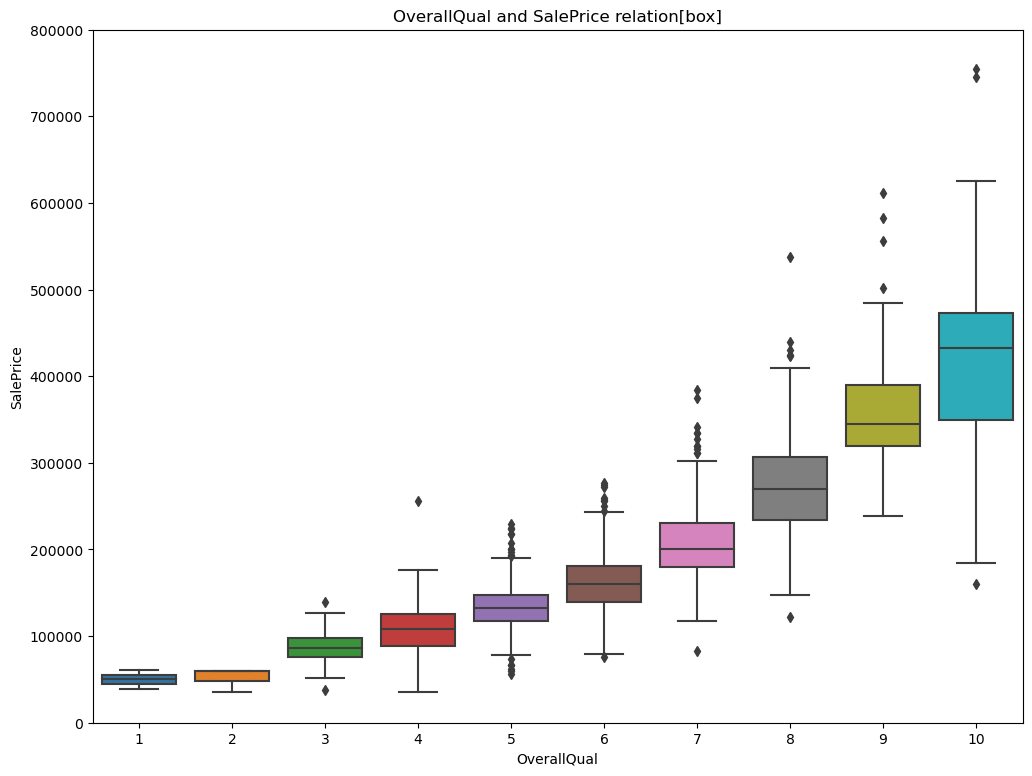

<Figure size 1200x900 with 1 Axes>

In [ ]:
y_data = data.SalePrice 
var1 = data_train.OverallQual
fig,ax = plt.subplots(figsize=(12,9))
fig = sns.boxplot(x=var1,y=y_data)
fig.axis(ymin = 0,ymax = 800000)
plt.title('OverallQual and SalePrice relation[box]')


The above graph is focused on analysing the overall quality of the houses by checking their relation with the sale price of that house. It is clear that the cost of high-quality houses costs is around 300000 to 500000. Whereas the lowest quality houses are much cheaper and they are below 100000.

#### Scatter plot of SalePrice versus GrLivArea in data_train using Seaborn and Matplotlib

Text(0.5, 1.0, 'GrLivArea  and SalePrice relation[scatter]')

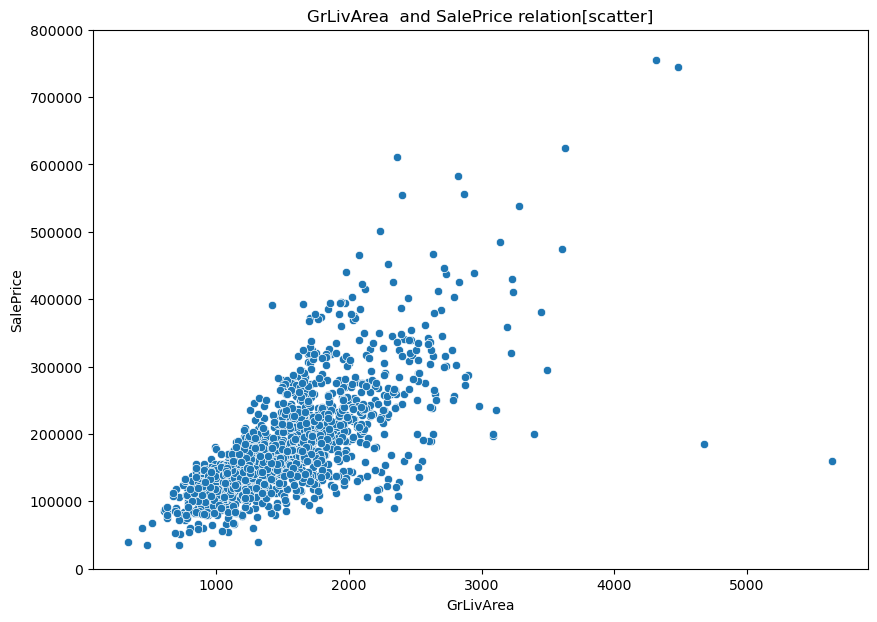

<Figure size 1000x700 with 1 Axes>

In [ ]:
var2 = data.GrLivArea
fig,ax = plt.subplots(figsize=(10,7))
fig = sns.scatterplot(x=var2,y=y_data)
fig.axis(ymin = 0,ymax = 800000)
plt.title('GrLivArea  and SalePrice relation[scatter]')

According to the above scatter plot, there are multiple outliers present in the data set (Yi,2020). if the relation between sale price and living area have been tallied in the above graph, it is seen that 4 data points belonged to the outlier set. On the other hand, maximum values lie between 100000 to 400000.

#### Box plot of log10(SalePrice) versus GrLivArea in data_train using Seaborn and Matplotlib

Text(0.5, 1.0, 'GrLivArea and SalePrice relation[box]')

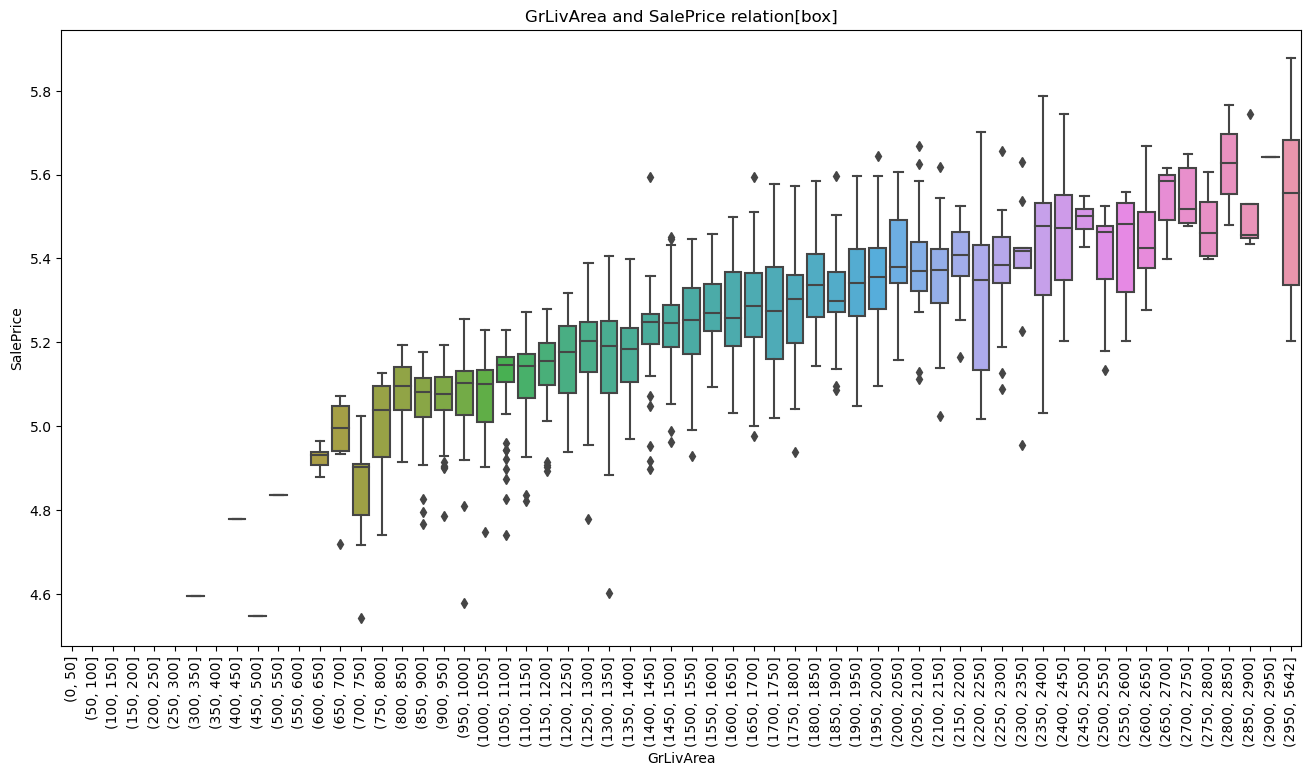

<Figure size 1600x800 with 1 Axes>

In [ ]:
bins = list(range(0,3000,50))
bins.append(var2.max())
var2_bins = pd.cut(var2,bins)
fig,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x = var2_bins,y=np.log10(y_data))
plt.xticks(rotation = 90)
plt.title('GrLivArea and SalePrice relation[box]')

## This code creates a box plot of log10(SalePrice) versus GrLivArea in the data_train dataset. The SalePrice values are first transformed using the log10() function and then stored in the y_data variable. 
## The GrLivArea values are stored in the var2 variable.

Considering the range of the GrLivArea, the box plot marks over 3000 data points under the radar. and by doing that, it is clear that from sale price 4.8 to 5.6, most of the houses belonged. 

#### Box plot of SalePrice versus GarageCars in data_train using Seaborn and Matplotlib

Text(0.5, 1.0, 'GarageCars and SalePrice relation[box]')

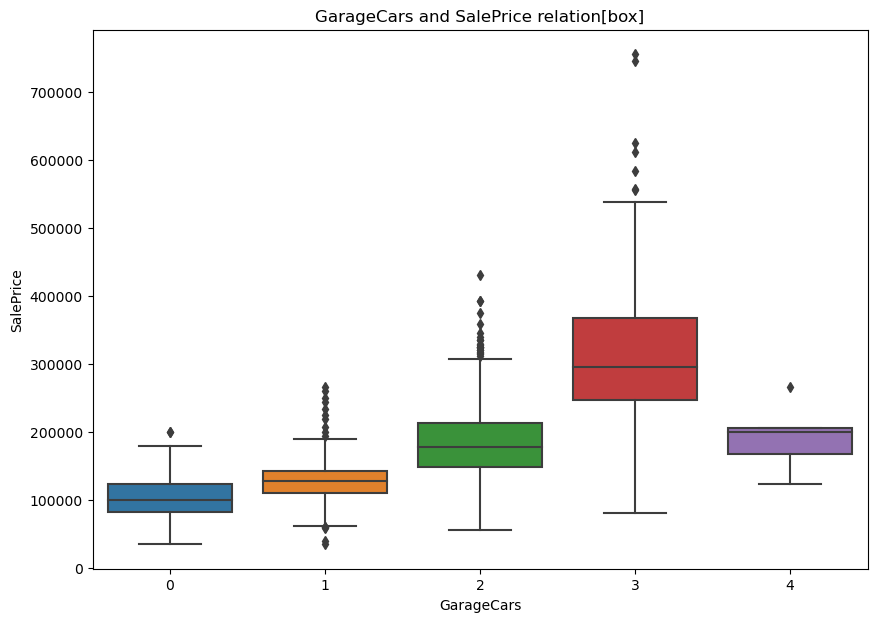

<Figure size 1000x700 with 1 Axes>

In [ ]:
var3 = data_train.GarageCars 
fig,ax = plt.subplots(figsize = (10,7))
fig = sns.boxplot(x = var3,y = y_data)
plt.title('GarageCars and SalePrice relation[box]')

## This code creates a box plot of SalePrice versus GarageCars in the data_train dataset.
## The SalePrice values are stored in the y_data variable, and the GarageCars values are stored in the var3 variable.

A boxplot is visualized and the relationship between the variable GarageCars and the target variable SalePrice in a dataset called data_train.

It assigns the GarageCars variable to var3 and creates a figure with a size of 10 inches by 7 inches and generates a boxplot with GarageCars on the x-axis and SalePrice on the y-axis. The box in the boxplot represents the IQR of the SalePrice variable for each value of GarageCars, the line inside the box represents the median SalePrice for that value, and the whiskers extending from the box represent the minimum and maximum SalePrice values within 1.5 times the IQR. Outliers are plotted as individual points beyond the whiskers.

The boxplot can help visualize the relationship between the two variables and identify any potential outliers. From the boxplot, it appears that houses with a garage that can accommodate 3 cars have a higher median SalePrice compared to houses with garages that can accommodate fewer or more cars. However, it is important to note that other factors could also be contributing to the relationship between GarageCars and SalePrice. The code sets a title for the plot to indicate the variables being visualized.

It's strange that when the GarageCars are 4, the house prices suddenly go down.

#### Scatter plot of SalePrice versus TotalBsmtSF in data_train using Seaborn and Matplotlib

Text(0.5, 1.0, 'TotalBsmtSf and SalePrice relation[scatter]')

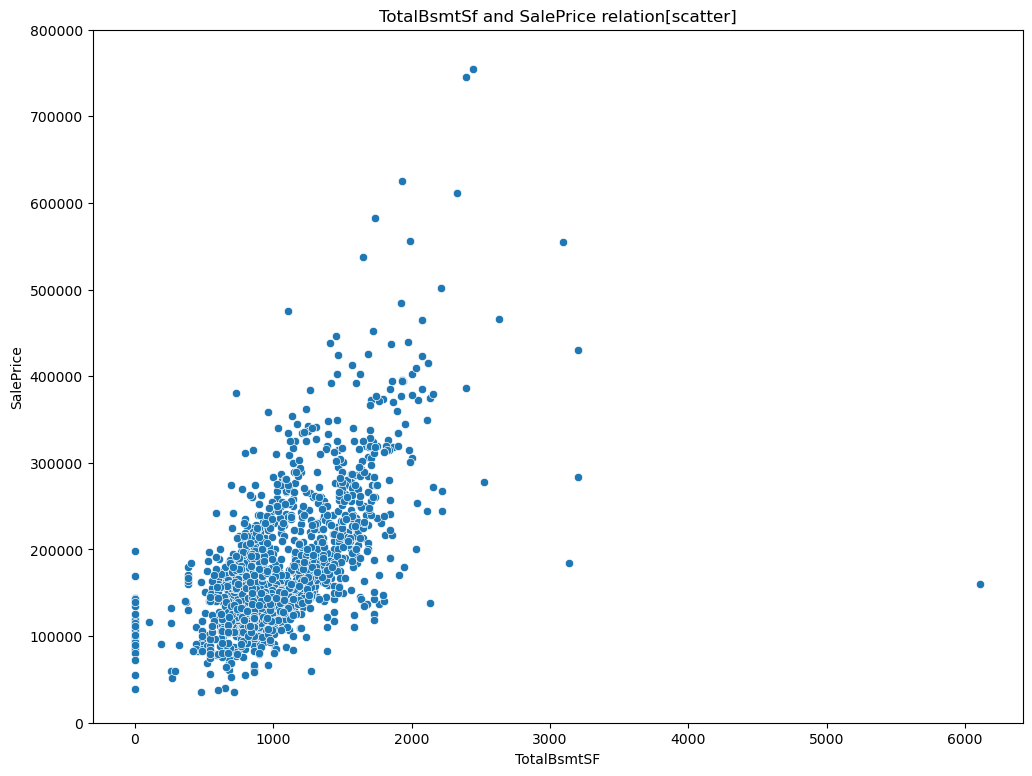

<Figure size 1200x900 with 1 Axes>

In [ ]:
var4 = data_train.TotalBsmtSF #GrLivArea
fig,ax = plt.subplots(figsize=(12,9))
fig = sns.scatterplot(x=var4,y = y_data)
fig.axis(ymin = 0,ymax = 800000)
plt.title('TotalBsmtSf and SalePrice relation[scatter]')

## This code creates a scatter plot of SalePrice versus TotalBsmtSF in the data_train dataset. 
## The SalePrice values are stored in the y_data variable, and the TotalBsmtSF values are stored in the var4 variable.

A scatter plot is visualized and the relationship between the variable TotalBsmtSF and the target variable SalePrice in a dataset called data_train. it has first assigned the TotalBsmtSF variable to var4.

It creates a figure with a size of 12 inches by 9 inches and generates a scatter plot with TotalBsmtSF on the x-axis and SalePrice on the y-axis. Each point in the plot represents a pair of values for TotalBsmtSF and SalePrice.

It adjusts the y-axis limits to be between 0 and 800,000 and sets a title for the plot.

The scatter plot can help visualize the overall trend between the two variables, showing whether there is a positive, negative or no relationship between them. It can also help identify any outliers or patterns in the data. However, it does not show the distribution of each variable and can be less effective in visualizing the relationship between two variables when one or both of them are categorical.

#### Boxplot of SalePrice versus TotalBsmtSF in data_train using Seaborn and Matplotlib with binned TotalBsmtSF data

Text(0.5, 1.0, 'TotalBsmtSf and SalePrice relation[box]')

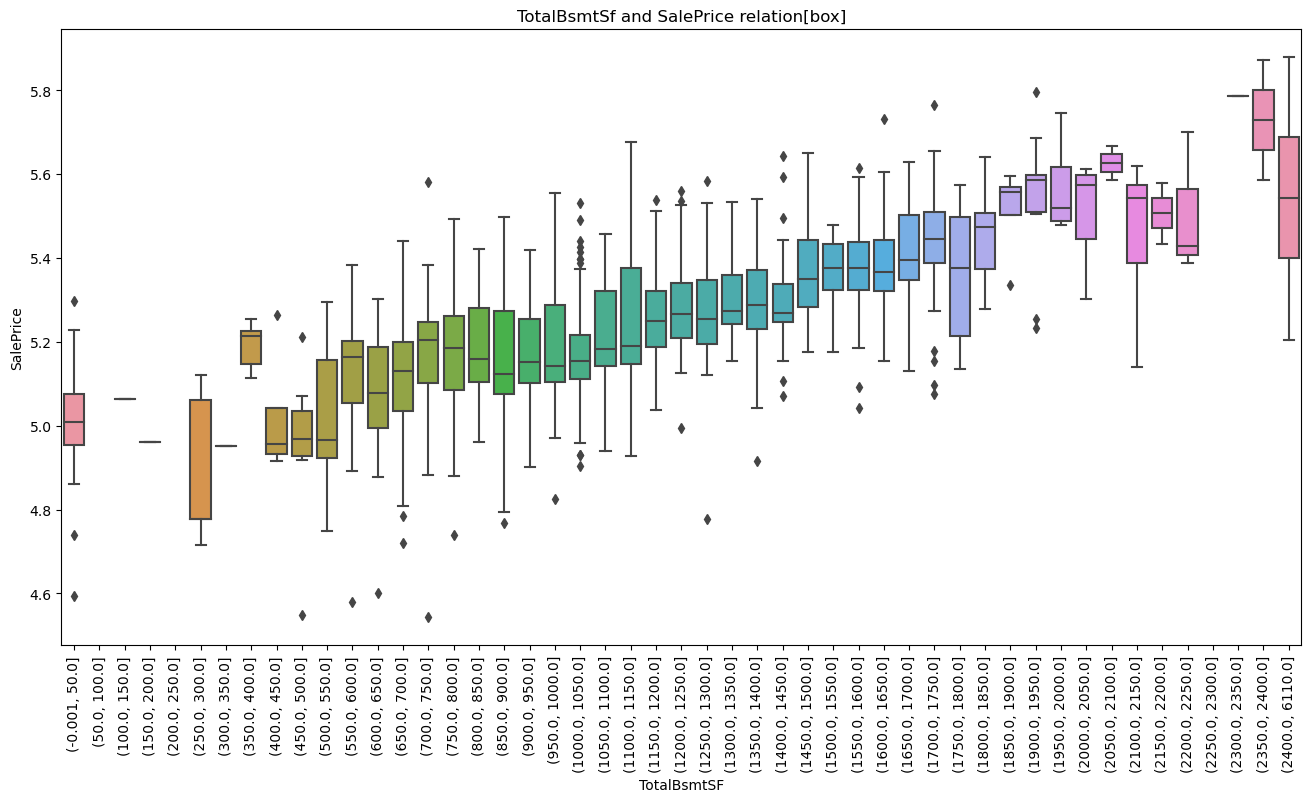

<Figure size 1600x800 with 1 Axes>

In [ ]:
bins = list(range(0,2401,50))
bins.append(var4.max())
var4_bins = pd.cut(var4,bins,include_lowest = True)
fig,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x = var4_bins,y=np.log10(y_data))
plt.xticks(rotation = 90)
plt.title('TotalBsmtSf and SalePrice relation[box]')

## This code creates a boxplot of SalePrice versus TotalBsmtSF in the data_train dataset. 
## The SalePrice values are stored in the y_data variable, and the TotalBsmtSF values are stored in the var4 variable.

A boxplot is visualized and the relationship between the variable TotalBsmtSF and the target variable SalePrice in a dataset (McCullum, 2020).

a list of bin edges that starts from 0, increments by 50, and ends at the maximum value of TotalBsmtSF. It then uses the pd.cut() function to bin the TotalBsmtSF variable using the specified bins, and includes the lowest edge in each bin. Next, it creates a figure with a size of 16 inches by 8 inches and generates a boxplot with the binned TotalBsmtSF variable on the x-axis and the logarithm of the SalePrice variable on the y-axis. The logarithm transformation of SalePrice is commonly used to normalize its distribution and improve the linearity of its relationship with other variables.

The box in the boxplot represents the IQR of the SalePrice variable for each bin of TotalBsmtSF, the line inside the box represents the median SalePrice for that bin, and the whiskers extending from the box represent the minimum and maximum SalePrice values within 1.5 times the IQR. Outliers are plotted as individual points beyond the whiskers.

#### YearBuilt and YearRemodAdd vs SalePrice

Text(0.5, 1.0, 'YearRemodAdd and SalePrice relation[box]')

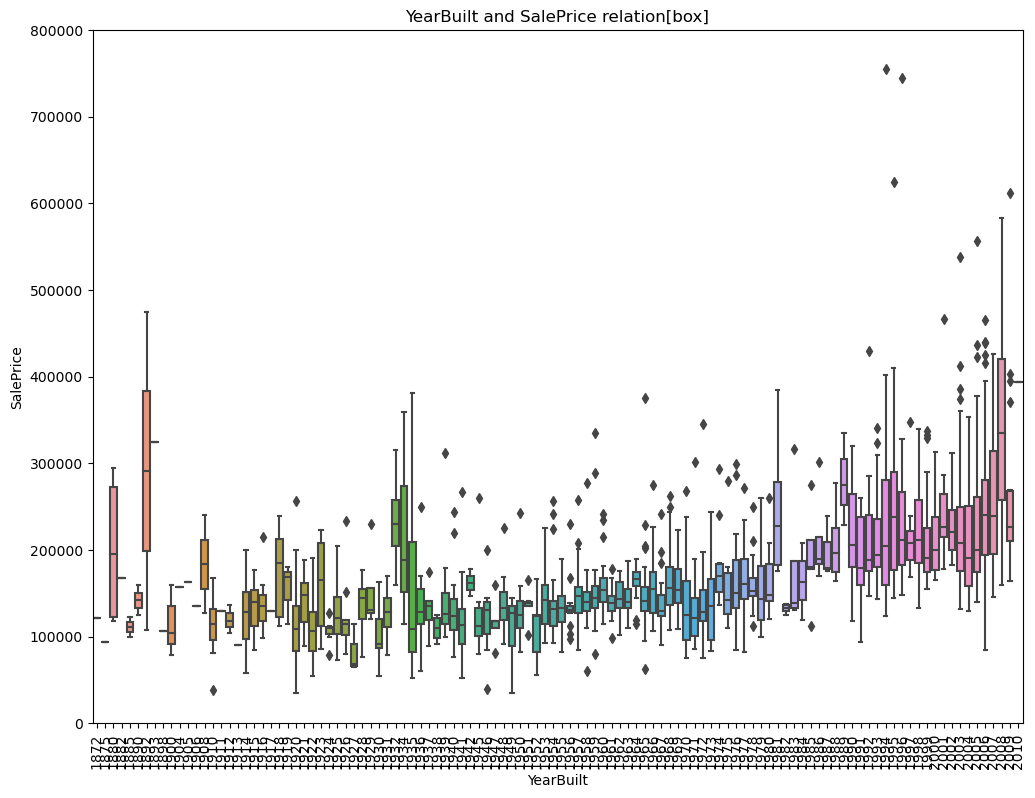

<Figure size 1200x900 with 1 Axes>

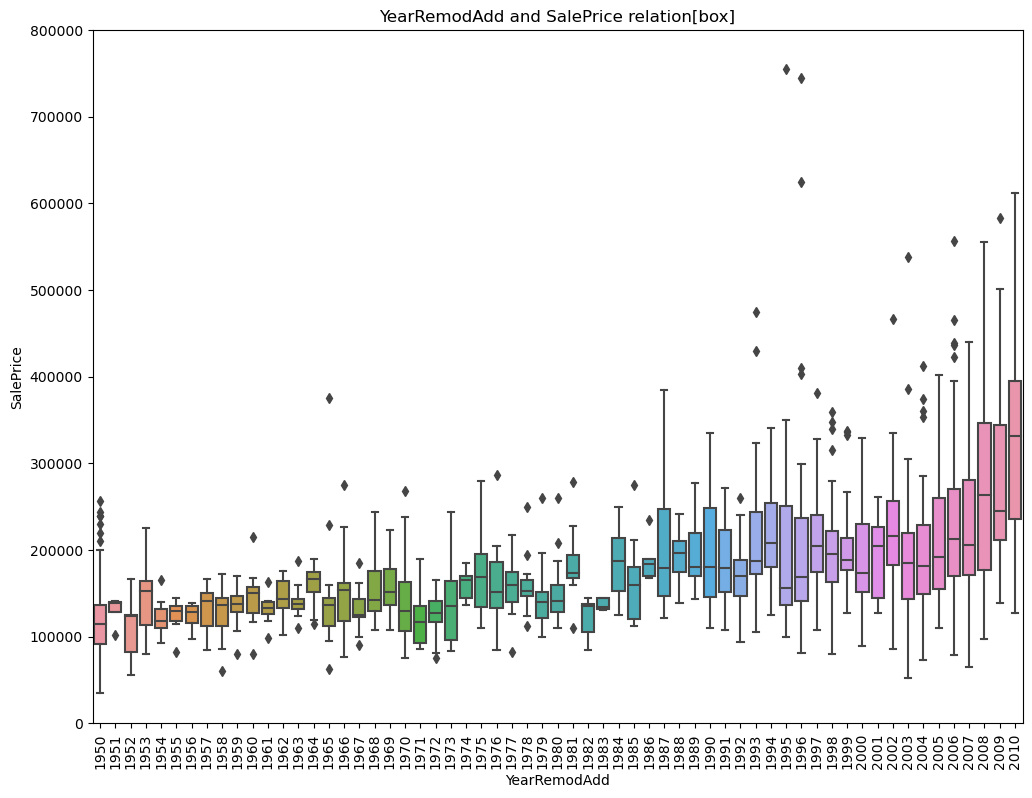

<Figure size 1200x900 with 1 Axes>

In [ ]:
var6 = data_train.YearBuilt
fig,ax = plt.subplots(figsize=(12,9))
fig = sns.boxplot(x=var6,y=y_data)
fig.axis(ymin = 0,ymax = 800000)
plt.xticks(rotation = 90)
plt.title('YearBuilt and SalePrice relation[box]')


var7 = data_train.YearRemodAdd
fig,ax = plt.subplots(figsize=(12,9))
fig = sns.boxplot(x=var7,y=y_data)
fig.axis(ymin = 0,ymax = 800000)
plt.xticks(rotation = 90)
plt.title('YearRemodAdd and SalePrice relation[box]')

The code generates two separate boxplots that show the relationship between two variables, YearBuilt and YearRemodAdd, and the target variable SalePrice in a dataset called data_train.

Each boxplot is displayed in a separate figure with the x-axis showing the year variable (YearBuilt or YearRemodAdd) and the y-axis showing the sale price.

The box in each boxplot represents the interquartile range (IQR) of the sale price for each year. The line inside the box represents the median sale price for that year, and the whiskers extending from the box represent the minimum and maximum sale prices within 1.5 times the IQR. Any points beyond the whiskers are considered outliers and are plotted as individual points.

The code sets the figure size to (12,9), adjusts the y-axis limits to be between 0 and 800,000, rotates the x-axis tick labels by 90 degrees, and sets a title for each plot.

#### Identifying and Handling Outliers in SalePrice

In [ ]:
from sklearn.preprocessing import StandardScaler 
saleprice_scaled = StandardScaler().fit_transform(data_train.SalePrice.values.reshape(-1,1))#Scaled
low_range = np.sort(saleprice_scaled[:,0])[:10]
high_range = np.sort(saleprice_scaled[:,0])[-10:]
print(low_range)
print(high_range)

data_train.drop(labels = data_train.GrLivArea.sort_values()[-5:].index,inplace = True)
data_train.drop(labels = data_train.TotalBsmtSF.sort_values()[-3:].index,inplace = True)


y_train = np.log1p(data_train.SalePrice)

[-1.83870376 -1.83352844 -1.80092766 -1.78329881 -1.77448439 -1.62337999
 -1.61708398 -1.58560389 -1.58560389 -1.5731    ]
[3.82897043 4.04098249 4.49634819 4.71041276 4.73032076 5.06214602
 5.42383959 5.59185509 7.10289909 7.22881942]


#### Data Preprocessing and Handling Missing Values

In [ ]:
len_train_data = len(data_train) 
all_data = pd.concat((data_train,data_test)).reset_index(drop = True) #train_data_test_data
all_data.drop(labels = ['SalePrice','Id'],axis = 1, inplace = True)
all_data_na = all_data.isnull().sum() 
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending = False)
Missing_data = pd.DataFrame({'Missing data':all_data_na/len(all_data)*100})
Missing_data.head(20)

,Missing data
PoolQC,99.725180
MiscFeature,96.392992
Alley,93.198214
Fence,80.419100
FireplaceQu,48.780488
LotFrontage,16.660941
GarageFinish,5.462041
GarageQual,5.462041
GarageCond,5.462041
GarageYrBlt,5.462041


              Missing data
PoolQC           99.725180
MiscFeature      96.392992
Alley            93.198214
Fence            80.419100
FireplaceQu      48.780488
LotFrontage      16.660941
GarageFinish      5.462041
GarageQual        5.462041
GarageCond        5.462041
GarageYrBlt       5.462041
GarageType        5.393336
BsmtExposure      2.816901
BsmtCond          2.816901
BsmtQual          2.782549
BsmtFinType1      2.713844
BsmtFinType2      2.713844
MasVnrType        0.824459
MasVnrArea        0.790106
MSZoning          0.137410
BsmtFullBath      0.068705

#### Dropping unnecessary features from the data set

In [ ]:
#PoolQC 
all_data.drop(labels = 'PoolQC',axis = 1,inplace = True)

#MiscFeature  
all_data.drop(labels = 'MiscFeature',axis = 1,inplace = True)

#Alley Na  
all_data.drop(labels = 'Alley',axis = 1,inplace = True)

#### Impute Missing Values

In [ ]:
#Fence Na = No Fence
all_data["Fence"] = all_data.Fence.fillna("None")

#FirePlaceQu Na = No FirePlace
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [ ]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood').LotFrontage.transform(lambda x:x.fillna(x.median()))

In [ ]:
#Garage X Garage Type，Na = No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):#Garage
    all_data[col] = all_data[col].fillna(0)
    
#Bsmt X Basement，Na = No Bsmt，
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'): #Bsmt
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'): 
    all_data[col] = all_data[col].fillna('None')
    
#MasVnrArea xMasVnr， Na = No MasVnr/ 0
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [ ]:
# total bathrooms
all_data['TotalBath'] = all_data['BsmtFullBath'] + (all_data['BsmtHalfBath'] / 2) + all_data['FullBath'] + (all_data['HalfBath'] / 2)

# Total Porch
all_data['TotalPorch'] = all_data['OpenPorchSF'] + (all_data['EnclosedPorch'] ) + all_data['3SsnPorch'] + (all_data['ScreenPorch'] )

# Drop Bathrooms
all_data.drop(labels = ['BsmtFullBath'],axis = 1, inplace = True)
all_data.drop(labels = ['BsmtHalfBath'],axis = 1, inplace = True)
all_data.drop(labels = ['FullBath'],axis = 1, inplace = True)
all_data.drop(labels = ['HalfBath'],axis = 1, inplace = True)

# Drop Porchs
all_data.drop(labels = ['OpenPorchSF'],axis = 1, inplace = True)
all_data.drop(labels = ['EnclosedPorch'],axis = 1, inplace = True)
all_data.drop(labels = ['3SsnPorch'],axis = 1, inplace = True)
all_data.drop(labels = ['ScreenPorch'],axis = 1, inplace = True)

In [ ]:
############################
# one hot encoding LotConfig
one_hot_Lot          = pd.get_dummies(all_data['LotConfig'])

# Aggregate the CulDSac and FR3
one_hot_Lot['CulDSac'] = one_hot_Lot.loc[ : ,  ['CulDSac','FR3']  ].sum(axis = 1)

# Remove the columns aggregated above
one_hot_Lot = one_hot_Lot.drop('FR3', axis = 1)

# Aggregate the Inside, FR2 and Corner
one_hot_Lot['Inside'] = one_hot_Lot.loc[ : ,  ['Inside','Corner','FR2']  ].sum(axis = 1)

# Remove the columns aggregated above
one_hot_Lot = one_hot_Lot.drop('FR2', axis = 1)
one_hot_Lot = one_hot_Lot.drop('Corner', axis = 1)

# joining codings together
all_data = all_data.join([one_hot_Lot])
all_data.drop(labels = ['LotConfig'],axis = 1, inplace = True)

############################
# one hot encoding Neighborhood
one_hot_Neighborhood = pd.get_dummies(all_data['Neighborhood'])

# Dropping smaller sample sizes (<100)
one_hot_Neighborhood = one_hot_Neighborhood.drop(['Somerst','Gilbert','NridgHt', 'Sawyer' ,'NWAmes' ,'SawyerW',     
                        'BrkSide','Crawfor','Mitchel','NoRidge','Timber' ,'IDOTRR' ,     
                        'ClearCr', 'StoneBr', 'SWISU'  , 'MeadowV', 'Blmngtn','BrDale' ,     
                        'Veenker', 'NPkVill','Blueste' ], axis = 1)

# joining codings together
all_data = all_data.join([one_hot_Neighborhood])
all_data.drop(labels = ['Neighborhood'],axis = 1, inplace = True)

In [ ]:
#MSZoning 
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#Electrical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Exterior1st and Exterior2nd
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#SaleType
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [ ]:
#Utilities、Functional、Street
all_data.drop(labels = ['Utilities','Functional','Street'] ,axis = 1,inplace = True)
#TotRmsAbvGrd,GarageAre,1stFlrSF, GrvLivAre
all_data.drop(labels = ['TotRmsAbvGrd','GarageArea','1stFlrSF'],axis = 1,inplace = True)

In [ ]:
all_data['MSSubClass'] =all_data['MSSubClass'].apply(str) #data_description MSSubClass=The building class
all_data['OverallCond'] = all_data['OverallCond'].apply(str) #QverallCond = Rates the overall condition of the house
all_data['YrSold'] = all_data['YrSold'].apply(str)
all_data['MoSold'] = all_data['MoSold'].apply(str)

#### Data Cleaning and Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols_factorize = list(('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold'))
all_data[cols_factorize]=all_data[cols_factorize].apply(LabelEncoder().fit_transform)
from scipy.special import boxcox1p
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index 
lam = 0.15
for feat in numeric_feats:
    all_data[feat] = boxcox1p(all_data[feat], lam)
'''dummy 数据，数据分离，完成数据清洗'''
all_data = pd.get_dummies(all_data)
train = all_data[:len_train_data]
test = all_data[len_train_data:]
train.to_csv('./x_train_finished.csv',index = False)
y_train.to_csv('./y_train_finished.csv',index = False)#y_trainSeries，DataFrame，shape
test.to_csv('./test_finished.csv',index = False)

#### Ensemble Regression Models for House Prices Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor#scaling
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
#Averaging
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
       
    def fit(self, x_train, y_train):
        self.models_ = [clone(x) for x in self.models]
        # Train cloned base models
        for model in self.models_:
            model.fit(x_train, y_train)
        return self 
   
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])#models
        return np.mean(predictions, axis=1)

#cross_validation
def rmsle_cv(model,x_train,y_train):
    rmse=np.sqrt(-cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error", cv = 5))#train，validation，x_train y_trian narray
    return (rmse)

#Gradient Boosting Regression：

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
score = rmsle_cv(GBoost,train.values,y_train.values)
print("GBoost_models score:{:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#Random Forest Rregression:
RandomForest = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs =-1,random_state =5,max_features = "sqrt", min_samples_leaf = 15)
score = rmsle_cv(RandomForest,train.values,y_train.values)
print("RandomForest_models score:{:.4f} ({:.4f})\n".format(score.mean(), score.std()))

averaged_models = AveragingModels(models = (GBoost,RandomForest))
score = rmsle_cv(averaged_models,train.values,y_train.values)
print("Average_models score:{:.4f} ({:.4f})\n".format(score.mean(), score.std()))

GBoost_models score:0.1191 (0.0061)

RandomForest_models score:0.1697 (0.0092)

Average_models score:0.1335 (0.0075)



#### Stacking Averaged Models for Regression

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso #Scaling
from sklearn.pipeline import make_pipeline 
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
       
    def fit(self,X,y):
        self.base_models_ = [list() for x in self.base_models] #list，xlist       
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds,shuffle = True,random_state= 156 ) #return a
        #dtypes, models
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i,model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y): 
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index,i] = list(y_pred)
        #stacking, new feature input, final classifier
        self.meta_model_.fit(out_of_fold_predictions,y)
        return self
   
    def predict(self,X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_
        ])#model meta_model
        return self.meta_model_.predict(meta_features) #meta_model

#LASSO Regression：
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#Models: ENet、GBoost、KRR，Lasso final_classifier
stacked_averaged_models = StackingAveragedModels(
    base_models = (ENet, GBoost, KRR),
    meta_model = lasso
)

score = rmsle_cv(stacked_averaged_models,train.values,y_train.values)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1111 (0.0074)


#### Ensemble Regression Model with Stacking and XGBoost/LightGBM

In [ ]:
import xgboost as xgb
import lightgbm as lgb

#XGBoost：
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1,random_state =7, nthread = -1)

#LightGBM:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720,max_bin = 55, bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

stacked_averaged_models.fit(train.values, y_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))#SalePrice

model_xgb.fit(train.values, y_train.values)
xgb_pred = np.expm1(model_xgb.predict(test.values))

model_lgb.fit(train.values, y_train.values)
lgb_pred = np.expm1(model_lgb.predict(test.values))

ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
stacked_final_pred = pd.DataFrame({'Id':data_test.Id,'SalePrice':ensemble})
stacked_final_pred.to_csv(r'submission.csv' ,index = False)


[02:56:24] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


<IPython.core.display.HTML object>

#### Actionable Insights

1. The scatter plot showing the relationship between GrLivArea and SalePrice suggests that larger living areas are generally associated with higher sale prices, but there are some outliers that may warrant further investigation.

        In addition to identifying the positive linear relationship between GrLivArea and SalePrice, the scatter plot can also help identify potential outliers that may not fit the general trend. These outliers could be due to data entry errors or other anomalies in the data, and may need to be further investigated to ensure the accuracy of the analysis. Additionally, the scatter plot can be used to identify any patterns or trends in the data that may not be immediately apparent through numerical analysis alone.

2. The analysis of the relationship between overall quality of houses and sale price shows that high-quality houses cost around 300,000 to 500,000, while the lowest quality houses are much cheaper and are below 100,000.

        Understanding the relationship between the overall quality of houses and sale price can provide valuable insights into the real estate market. By identifying the price ranges associated with different levels of quality, buyers and sellers can make more informed decisions about the properties they are interested in. Additionally, this information can be useful for real estate professionals who are looking to target specific segments of the market or identify potential areas for growth.

3. The boxplot of GarageCars and SalePrice shows that houses with a garage that can accommodate 3 cars have a higher median SalePrice compared to houses with garages that can accommodate fewer or more cars. This information can be useful in understanding the relationship between the two variables and identifying potential outliers.

        The boxplot can be a useful tool for identifying patterns and trends in data, particularly when there are multiple variables involved. By visualizing the relationship between GarageCars and SalePrice, the boxplot can help identify potential outliers that may not be immediately apparent through numerical analysis alone. Additionally, the boxplot can be used to identify any potential confounding variables that may be contributing to the relationship between GarageCars and SalePrice.

4. The boxplots of YearBuilt and YearRemodAdd show the relationship between each variable and SalePrice. It appears that there is some variation in sale prices across different years, with some years having higher median sale prices than others.

        By analyzing the relationship between SalePrice and YearBuilt/YearRemodAdd, it is possible to identify any trends or patterns in the real estate market over time. This information can be useful for buyers and sellers who are looking to make informed decisions about their investments, as well as for real estate professionals who are looking to identify potential areas for growth or decline. Additionally, the boxplots can be used to identify any potential confounding variables that may be contributing to the relationship between YearBuilt/YearRemodAdd and SalePrice.

    The provided information suggests that there are many factors that can influence the sale price of a property, including its size, quality, age, and other features such as garage spaces. One additional insight that can be derived is that potential buyers may need to carefully evaluate all of these factors when considering a purchase. By doing so, they can ensure that they are making an informed decision and that they are getting the best possible value for their investment.

**Conclusion**

In conclusion, the House Price Advanced Regression Techniques competition provides a rich dataset that challenges data scientists to develop an accurate regression model for predicting housing prices. Proper data preprocessing and exploratory data analysis are essential for understanding the dataset and developing a good model. The resulting regression model can help real estate professionals and potential home buyers to make informed decisions about buying or selling a house. This competition is a great opportunity for data scientists to hone their machine learning skills and apply them to a real-world problem.




**References**

Yi, M. (2020). A complete guide to scatter plots. Chartio. Retrieved February 25, 2023, from https://chartio.com/learn/charts/what-is-a-scatter-plot/ 
                                                                                                          
Valkov, V. (2019, July 5). Predicting house prices with linear regression: Machine learning from scratch (part II). Medium. Retrieved February 25, 2023, from https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1 

McCullum, N. (2020). How to create Boxplots in python using Matplotlib. Nick McCullum Headshot. Retrieved February 25, 2023, from https://www.nickmccullum.com/python-visualization/boxplot/ 